In [1]:
import math
import random
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Class point (representing each point)

In [2]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def distanceTo(self, point):
        xDistance = abs(self.getX() - point.getX())
        yDistance = abs(self.getY() - point.getY())
        distance = math.sqrt( (xDistance*xDistance) + (yDistance*yDistance) )
        return distance
    
    def __repr__(self):
        return str(self.getX()) + ";" + str(self.getY())

    def getX(self):
        return self.x
    
    def getY(self):
        return self.y

# Class Route representing each route between points

In [3]:
class Route:
    def __init__(self, route=None):
        self.route = []
        self.fitness = 0.0
        self.distance = 0
        if route is not None:
            self.route = route
        else:
            for i in range(0, len(points)):
                self.route.append(None)

    def __repr__(self):
        geneString = ""
        for i in range(0, self.routeSize()):
            geneString += "[" + str(self.getPoint(i)) + "]"
        return geneString
    
    def generateIndividual(self):
        for PI in range(0, len(points)):
            self.setPoint(PI, points[PI])
        random.shuffle(self.route)
    
    def getPoint(self, routePosition):
        return self.route[routePosition]
    
    def setPoint(self, routePosition, p):
        self.route[routePosition] = p
        self.fitness = 0.0
        self.distance = 0
    
    def getFitness(self):
        if self.fitness == 0:
            self.fitness = 1/float(self.getDistance())
        return self.fitness
    
    def getDistance(self):
        if self.distance == 0:
            routeDistance = 0
            for PI in range(0, self.routeSize()):
                fromPoint = self.getPoint(PI)
                target = None
                if PI+1 < self.routeSize():
                    target = self.getPoint(PI+1)
                else:
                    target = self.getPoint(0)
                routeDistance += fromPoint.distanceTo(target)
            self.distance = routeDistance
        return self.distance
    
    def routeSize(self):
        return len(self.route)
    
    def containsPoint(self, p):
        return p in self.route



# Population Class representing points and routes links

In [4]:
class Population:
    def __init__(self, populationSize, initialise):
        self.routes = []
        for i in range(0, populationSize):
            self.routes.append(None)
        
        if initialise:
            for i in range(0, populationSize):
                newRoute = Route()
                newRoute.generateIndividual()
                self.saveRoute(i, newRoute)
        
    def saveRoute(self, index, route):
        self.routes[index] = route
    
    def getRoute(self, index):
        return self.routes[index]
    
    def getFittest(self):
        fittest = self.routes[0]
        for i in range(0, self.populationSize()):
            if fittest.getFitness() <= self.getRoute(i).getFitness():
                fittest = self.getRoute(i)
        return fittest
    
    def populationSize(self):
        return len(self.routes)

# Evolution

In [5]:
class GA:
    def __init__(self):
        self.mutationRate = 0.015
        self.tournamentSize = 70
        self.elitism = True
    
    def evolvePopulation(self, pop):
        newPopulation = Population(pop.populationSize(), False)
        elitismOffset = 0
        if self.elitism:
            newPopulation.saveRoute(0, pop.getFittest())
            elitismOffset = 1
        
        for i in range(elitismOffset, newPopulation.populationSize()):
            parent1 = self.tournamentSelection(pop)
            parent2 = self.tournamentSelection(pop)
            child = self.crossover(parent1, parent2)
            newPopulation.saveRoute(i, child)
        
        for i in range(elitismOffset, newPopulation.populationSize()):
            self.mutate(newPopulation.getRoute(i))
        
        return newPopulation
    
    def crossover(self, parent1, parent2):
        child = Route()
        
        posA = int(random.random() * parent1.routeSize())
        posB = int(random.random() * parent1.routeSize())
        
        startPos = min(posA, posB)
        endPos = max(posA, posB)
        
        for i in range(startPos, endPos):
            child.setPoint(i, parent1.getPoint(i))
    
        for i in range(0, parent2.routeSize()):
            if not child.containsPoint(parent2.getPoint(i)):
                for j in range(0, child.routeSize()):
                    if child.getPoint(j) == None:
                        child.setPoint(j, parent2.getPoint(i))
                        break
        return child
    
    def mutate(self, route):
        for routePos1 in range(0, route.routeSize()):
            if random.random() < self.mutationRate:
                routePos2 = int(route.routeSize() * random.random())
                
                p1 = route.getPoint(routePos1)
                p2 = route.getPoint(routePos2)
                
                route.setPoint(routePos2, p1)
                route.setPoint(routePos1, p2)
    
    def tournamentSelection(self, pop):
        tournament = Population( self.tournamentSize, False)
        for i in range(0, self.tournamentSize):
            randomId = int(random.random() * pop.populationSize())
            tournament.saveRoute(i, pop.getRoute(randomId))
        fittest = tournament.getFittest()
        return fittest

# Create routes

In [6]:
def addRoutes(nameFile):
    tab = []
    file = open(nameFile, 'r')
    for line in file:
        data = line.strip()
        if(data[0].isdigit()):
            data = data.split()
            
            for i in range(0, len(data)):
                data[i]=(int(data[i]))

            p = Point(data[1], data[2])
            points.append(p)
            tab.append(data)
    file.close()

# Main

Initial distance: 3987.6069614077264
Final distance: 1372.7497665315266


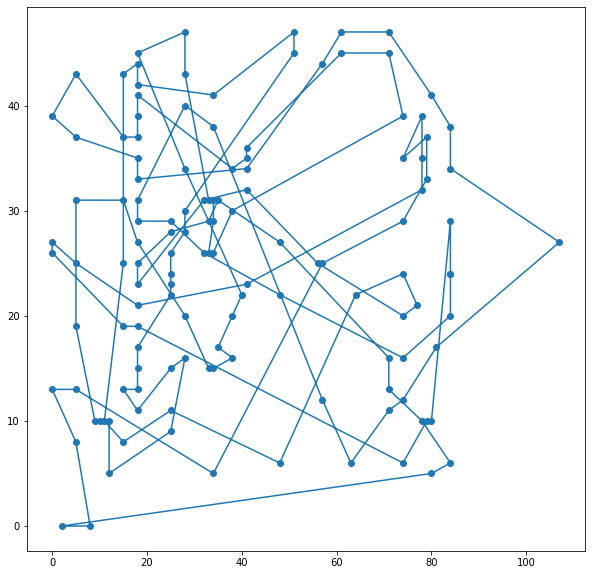

In [8]:
points = []
addRoutes('xqf131.txt')

# Initialize population
pop = Population(100, True)
nb_evolutions = 500
print ("Initial distance:", pop.getFittest().getDistance())

ga = GA()
p1 = Route()
p2 = Route()
pop = ga.evolvePopulation(pop)
for i in range(nb_evolutions):
    pop = ga.evolvePopulation(pop)

fittest = pop.getFittest()
val = []
for i in range (0, fittest.routeSize()):
    coordinates = [fittest.getPoint(i).getX(), fittest.getPoint(i).getY()]
    val.append(coordinates)
coordFirst = [fittest.getPoint(0).getX(), fittest.getPoint(0).getY()]
val.append(coordFirst)

print ("Final distance:", pop.getFittest().getDistance())
#print ("Solution:" , pop.getFittest())

data = np.array(val)
x, y = data.T
fig= plt.figure(figsize=(10,10))
plt.scatter(x,y)
plt.plot(x,y)
plt.show()